### Sklearn Regression Tree

In [38]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
# Load the car crashes dataset from seaborn
car_crashes = sns.load_dataset("car_crashes")

# Inspect the dataset
print(car_crashes.head())

   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  


In [40]:
# We will predict 'total' (total number of crashes) using other features

X = car_crashes[['speeding', 'alcohol', 'not_distracted', 'ins_premium', "ins_losses"]]
y = car_crashes['total']  # Total number of car crashes as target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(criterion='squared_error', min_samples_leaf=6, max_depth=4, random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=6, random_state=42)

Mean Squared Error: 9.6319
R² Score: 0.4674


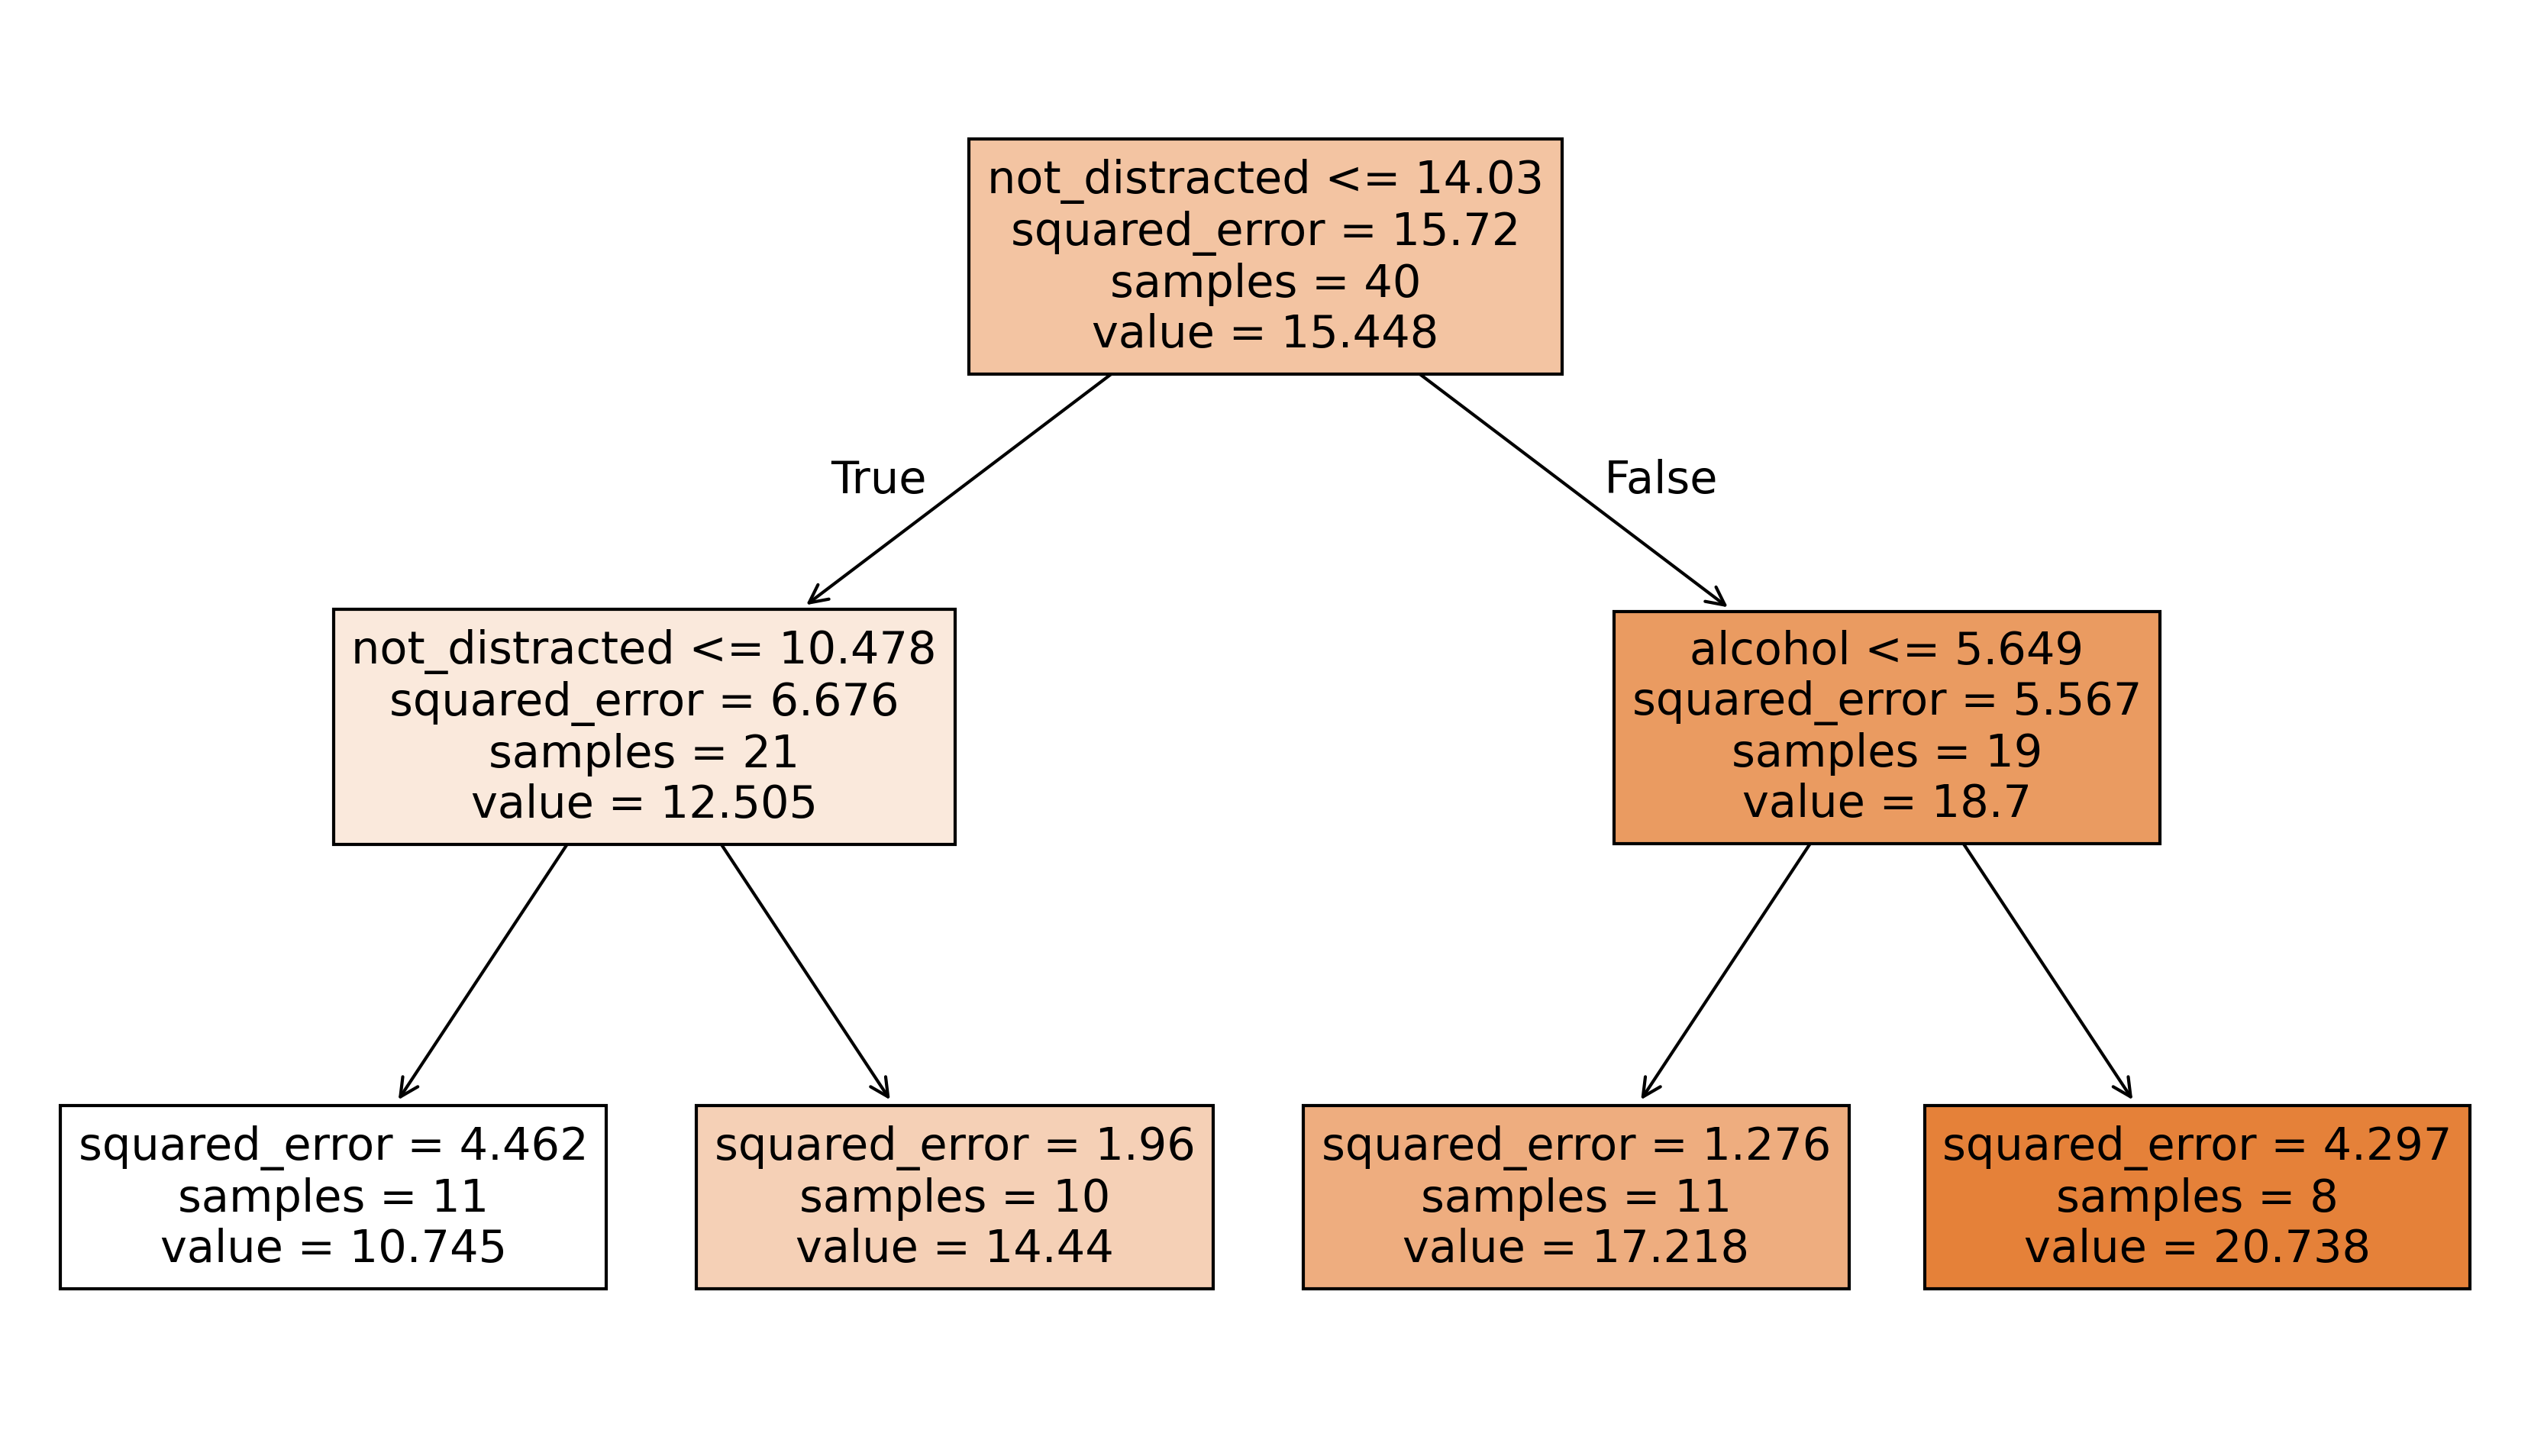

In [ ]:
# Make predictions on the test set
y_pred = tree_regressor.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Visualize the regression tree
plt.figure(figsize=(14, 8), dpi=300)
plot_tree(tree_regressor, feature_names=X_train.columns, filled=True)
plt.show()
